# Funding Project

The goal of this project is to determine whether including the name of the project will help better predict whether the project will receive funding or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing and exploring the data

In [2]:
#Read in csv file
df = pd.read_csv('FundingProject.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110815 entries, 0 to 110814
Data columns (total 15 columns):
ID                  110815 non-null int64
name                110814 non-null object
category            110815 non-null object
main_category       110815 non-null object
currency            110815 non-null object
deadline            110815 non-null object
goal                110815 non-null int64
launched            110815 non-null object
pledged             110815 non-null float64
state               110815 non-null object
backers             110815 non-null int64
country             110815 non-null object
usd pledged         109999 non-null float64
usd_pledged_real    110815 non-null float64
usd_goal_real       110815 non-null float64
dtypes: float64(4), int64(3), object(8)
memory usage: 12.7+ MB


In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,1/1/2016,6000,12/7/2015 18:21,100.0,failed,2,CA,74.84,70.89,4253.51
1,1019043170,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,1/1/2016,2000,12/11/2015 10:52,2102.0,successful,48,BE,2314.01,2282.97,2172.19
2,1036288991,The Liaisons: a new twist on the old standards,Jazz,Music,USD,1/1/2016,5000,11/9/2015 20:12,5630.0,successful,116,US,5630.00,5630.00,5000.00
3,1045749249,The Many Encounters of Bosley Bear,Children's Books,Publishing,USD,1/1/2016,20000,11/24/2015 2:08,101.0,failed,2,US,101.00,101.00,20000.00
4,1048577059,Swift & Co | Innovative Men's Footwear,Footwear,Fashion,GBP,1/1/2016,40000,11/17/2015 12:30,2246.0,failed,19,GB,3416.59,3273.48,58298.84


In [5]:
df.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
110810,934175174,Project ChArma presents Full Circle at Dance P...,Performances,Dance,USD,12/31/2017,5500,12/1/2017 18:33,5788.0,successful,95,US,0.00,5788.00,5500.00
110811,966045318,Haboob Wind - The Movie,Drama,Film & Video,USD,12/31/2017,200000,11/16/2017 19:49,125.0,failed,2,US,100.00,125.00,200000.00
110812,975200838,Honey Pot,Music,Music,USD,12/31/2017,11000,11/18/2017 17:24,0.0,canceled,0,US,0.00,0.00,11000.00
110813,982495472,LOL Mugs with daily laugh and inspirational me...,Interactive Design,Design,AUD,12/31/2017,1000,11/22/2017 20:21,88.0,failed,3,AU,66.32,69.00,784.13
110814,997184429,Tapagotchi - Mobile Virtual Pet RPG,Mobile Games,Games,AUD,12/31/2017,10000,12/1/2017 8:12,20.0,canceled,2,AU,15.17,15.68,7841.29


In [6]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,1.108150e+05,1.108150e+05,1.108150e+05,110815.000000,1.099990e+05,1.108150e+05,1.108150e+05
mean,1.074621e+09,6.466885e+04,1.371428e+04,125.900636,4.786187e+03,1.170209e+04,5.388820e+04
std,6.186249e+08,1.419644e+06,1.173463e+05,918.070823,6.030697e+04,1.043228e+05,1.271062e+06
min,1.852000e+04,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.900000e-01
25%,5.410910e+08,2.000000e+03,2.600000e+01,2.000000,0.000000e+00,2.595500e+01,2.000000e+03
50%,1.075154e+09,7.000000e+03,5.810000e+02,11.000000,1.160000e+02,5.500000e+02,6.214070e+03
75%,1.607917e+09,2.000000e+04,4.724500e+03,60.000000,1.154000e+03,4.318320e+03,2.000000e+04
max,2.147448e+09,1.000000e+08,1.277984e+07,154926.000000,1.277984e+07,1.277984e+07,1.073699e+08


In [7]:
#Checking which attributes have nulls and how many.
df.isnull().sum()

ID                    0
name                  1
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         816
usd_pledged_real      0
usd_goal_real         0
dtype: int64

In [8]:
#Preliminary check for correlations between attributes
df.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.002238,0.001381,0.001722,-0.002482,-0.000024,0.000889
goal,0.002238,1.000000,0.006003,-0.001179,0.001696,0.001068,0.911862
pledged,0.001381,0.006003,1.000000,0.667034,0.670862,0.902092,0.001180
backers,0.001722,-0.001179,0.667034,1.000000,0.502297,0.735071,-0.000570
usd pledged,-0.002482,0.001696,0.670862,0.502297,1.000000,0.759433,0.002248
usd_pledged_real,-0.000024,0.001068,0.902092,0.735071,0.759433,1.000000,0.001603
usd_goal_real,0.000889,0.911862,0.001180,-0.000570,0.002248,0.001603,1.000000


## Data cleaning

Filling in nulls

In [9]:
#Finding index where attribute where 'name' is null
df[df['name'].isnull()].index.tolist()

[33626]

In [10]:
#Viewing information where attribute 'name' is null
df.iloc[33626]

ID                       648853978
name                           NaN
category            Product Design
main_category               Design
currency                       USD
deadline                 7/18/2016
goal                          2500
launched            6/18/2016 5:01
pledged                          0
state                    suspended
backers                          0
country                         US
usd pledged                      0
usd_pledged_real                 0
usd_goal_real                 2500
Name: 33626, dtype: object

In [11]:
#Converting attributes 'launched' and 'deadline' from object to datetime
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

In [12]:
#Checking values for each unique values in 'usd pledged'
df['usd pledged'].value_counts()

0.00        30040
1.00         1489
25.00        1180
10.00         913
50.00         827
            ...  
1648.56         1
13578.00        1
437.91          1
1155.16         1
13311.00        1
Name: usd pledged, Length: 35363, dtype: int64

In [13]:
#Checking out all unique values for each attribute
col = df.columns

for c in col:
    print(c, ':', df[c].unique())

ID : [1015685046 1019043170 1036288991 ...  975200838  982495472  997184429]
name : ['Organic Tattoo remains 10 days (Self use & custom designs)'
 'Handcrafted leather wallet | key holder | card holder'
 'The Liaisons:  a new twist on the old standards' ... 'Honey Pot'
 'LOL Mugs with daily laugh and inspirational message'
 'Tapagotchi - Mobile Virtual Pet RPG']
category : ['Accessories' 'Jazz' "Children's Books" 'Footwear' 'World Music'
 'Hip-Hop' 'Product Design' 'Apparel' 'Literary Journals' 'Plays' 'Web'
 'Restaurants' 'Music' 'Television' 'Photobooks' 'Comedy' 'Video Games'
 'Webcomics' 'DIY Electronics' 'Architecture' 'Shorts' 'Apps' 'Nonfiction'
 'Hardware' 'Flight' 'Small Batch' 'Tabletop Games' 'R&B' 'Games'
 'Country & Folk' 'Metal' 'Indie Rock' 'Technology' 'Journalism' 'Fashion'
 'Comic Books' 'Documentary' 'Poetry' 'Horror' 'Academic' 'Farms' 'Faith'
 'Crafts' 'Food' 'Publishing' 'Drama' 'Audio' 'Sound' 'Festivals'
 'Playing Cards' 'Science Fiction' 'Jewelry' 'Vegan' 'Anth

country : ['CA' 'BE' 'US' 'GB' 'DE' 'AU' 'N,0"' 'DK' 'NZ' 'IE' 'IT' 'FR' 'SE' 'CH'
 'ES' 'NL' 'AT' 'NO' 'LU' 'SG' 'HK' 'MX' 'JP']
usd pledged : [  74.84 2314.01 5630.   ...  823.33   45.78   66.32]
usd_pledged_real : [  70.89 2282.97 5630.   ... 1541.64 2602.     84.32]
usd_goal_real : [4253.51 2172.19 5000.   ... 5163.42  457.71  784.13]


### Data Visualization

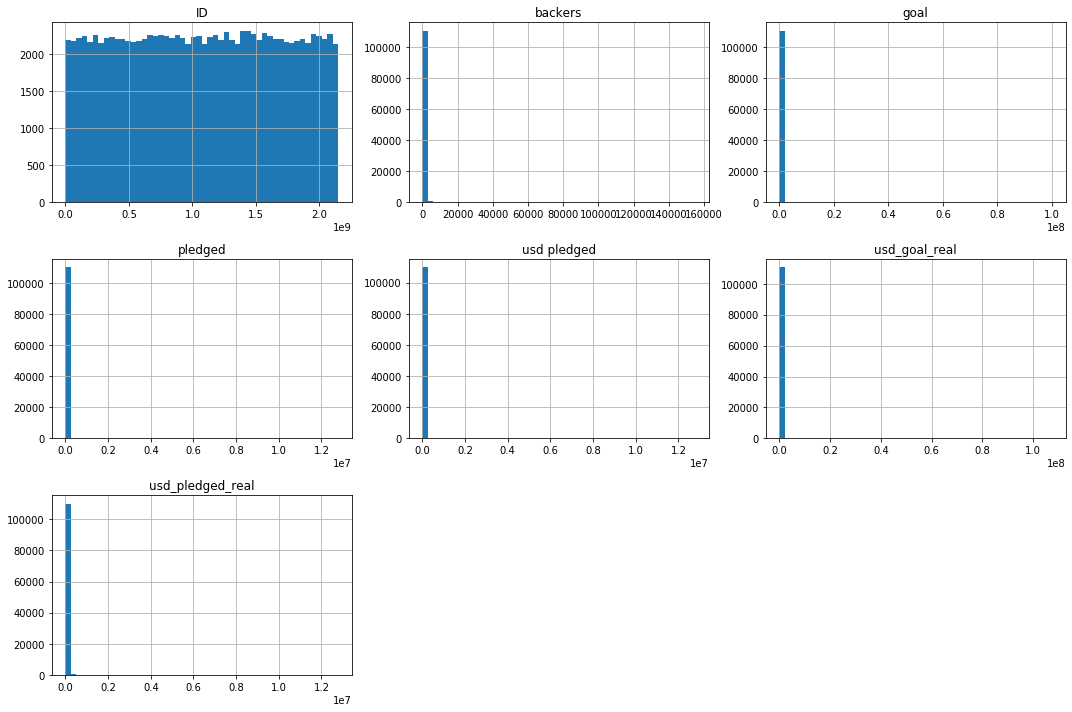

In [14]:
#Graphing the distributions of the following attributes
df.hist(figsize = (15, 10), bins = 50)
plt.tight_layout()
plt.show();

In [15]:
#Normalizing the attributes
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['backers', 'goal', 
    'pledged', 'usd pledged', 
    'usd_goal_real', 'usd_pledged_real']] = scaler.fit_transform(df[['backers', 'goal', 
                                                                     'pledged', 'usd pledged', 
                                                                     'usd_goal_real', 'usd_pledged_real']])

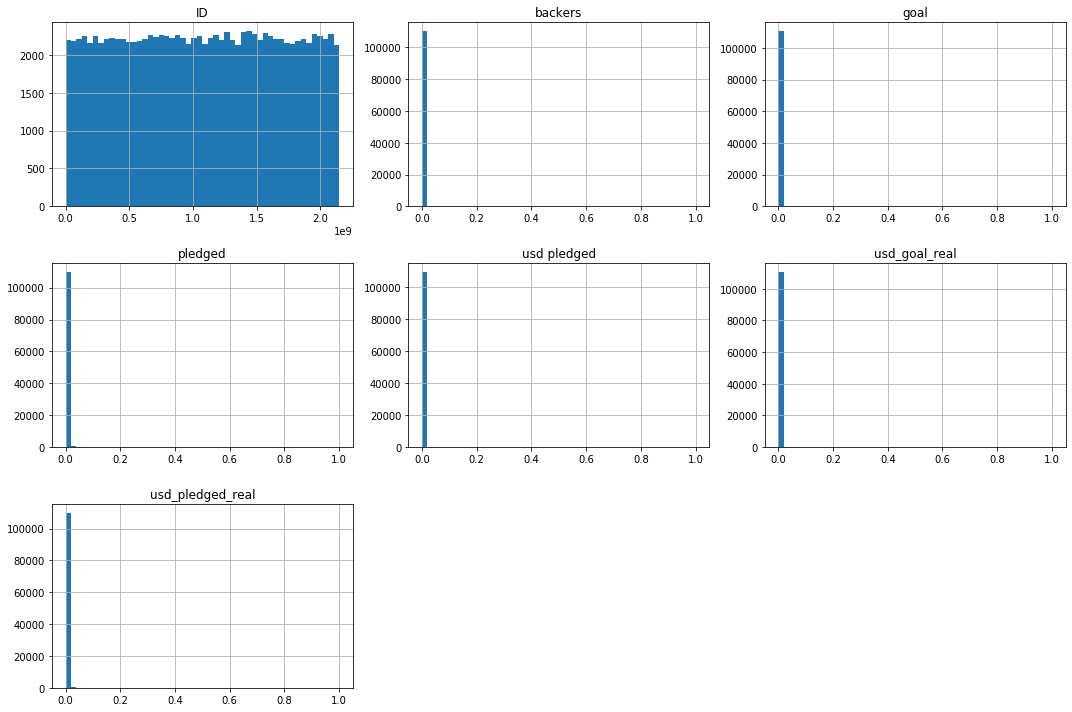

In [16]:
#Viewing the distribution after normalization
df.hist(figsize = (15, 10), bins = 50)
plt.tight_layout()
plt.show();

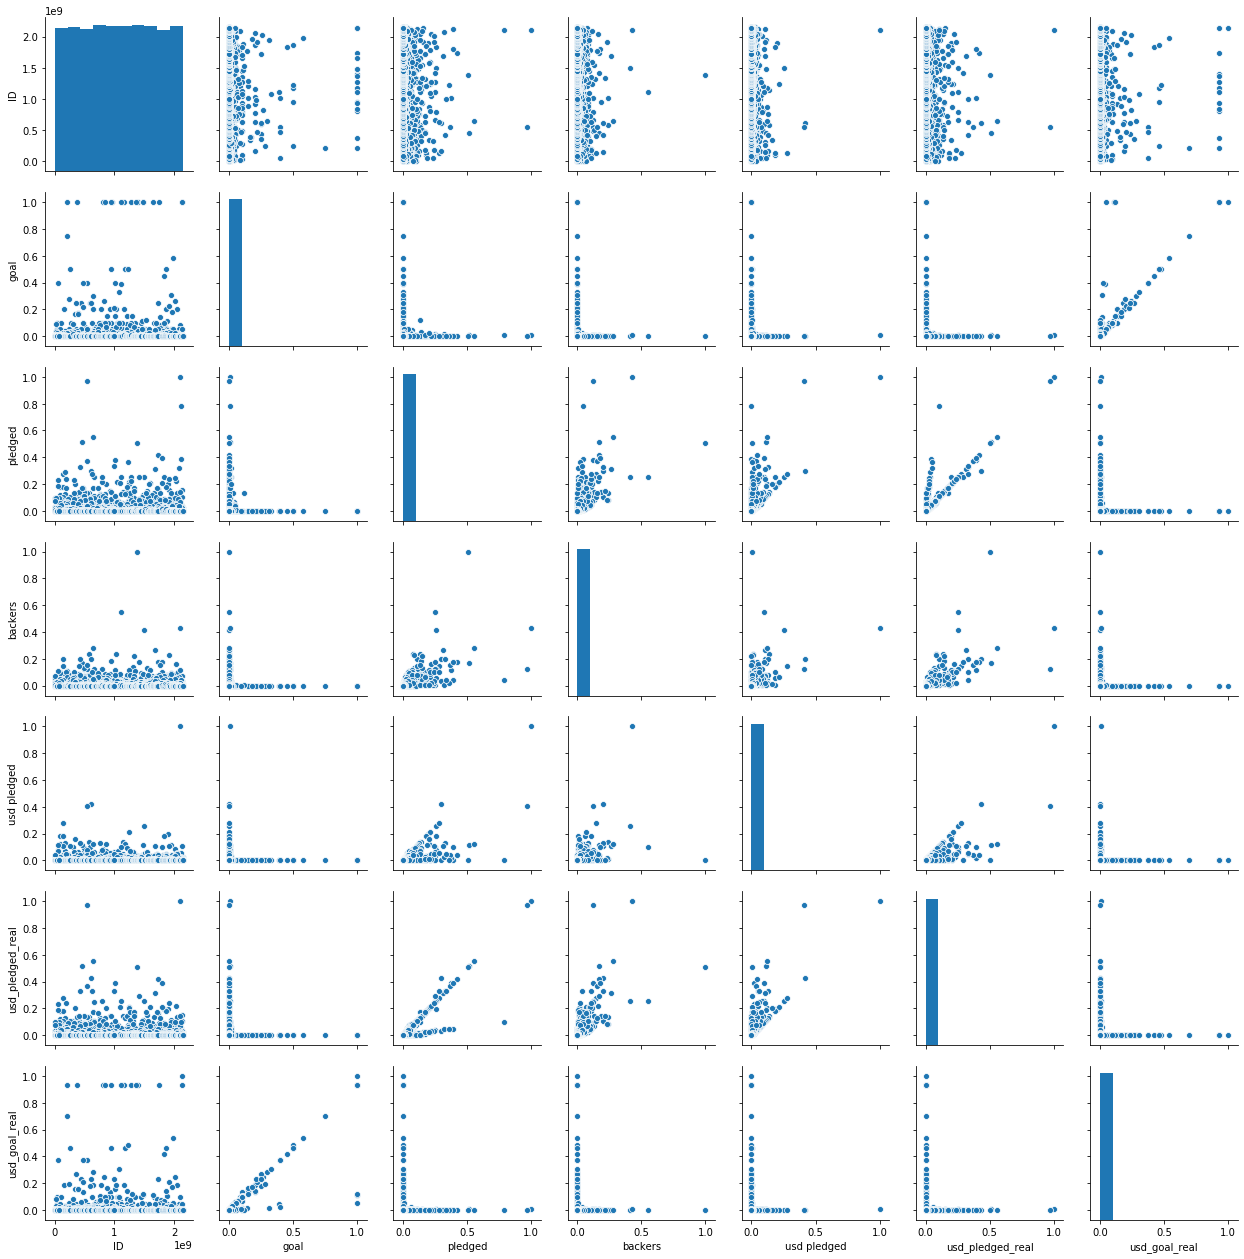

In [17]:
sns.pairplot(df);

In [18]:
#Renaming any status that is not labeled 'successful' as 'failed'
df['state'].replace({'canceled': 'failed', 'undefined': 'failed', 'suspended': 'failed'}, inplace = True)

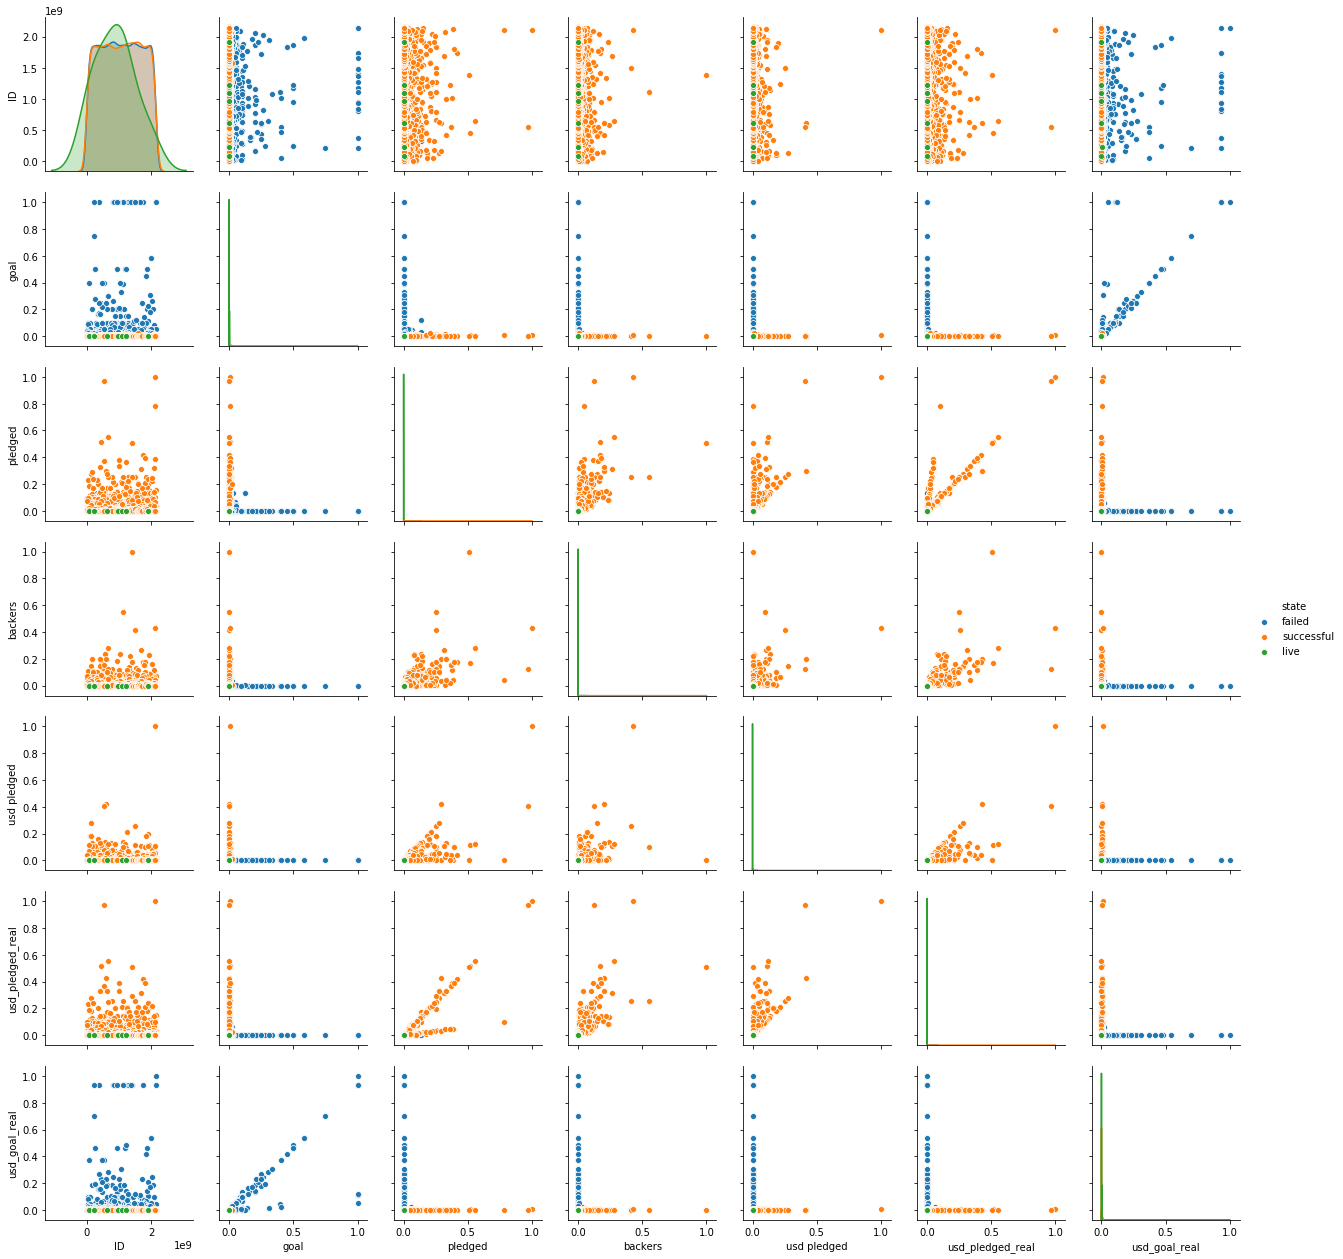

In [19]:
sns.pairplot(df, hue = 'state');

In [20]:
df.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,2016-01-01,0.00006,2015-12-07 18:21:00,0.000008,failed,0.000013,CA,0.000006,0.000006,0.00004
1,1019043170,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,2016-01-01,0.00002,2015-12-11 10:52:00,0.000164,successful,0.000310,BE,0.000181,0.000179,0.00002


In [21]:
#Dropping unneccessary/duplicated attributes
df.drop(['pledged', 'goal', 'usd pledged', 'currency'], axis = 1, inplace = True)

In [22]:
df['state'].value_counts()

failed        72636
successful    38172
live              7
Name: state, dtype: int64

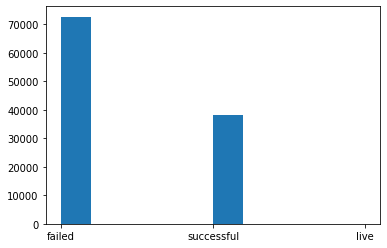

In [23]:
plt.hist(df['state'])
plt.show()

In [24]:
#Dropping all nulls
df.dropna(axis = 0, inplace = True)

In [25]:
#Assigning numerical values to status of funding
df['state'].replace({'failed' : 0, 'successful': 1, 'live': 2}, inplace = True)

In [40]:
#Checking to see how many failed, successful, and live results there are.
df['state'].value_counts()

0    72635
1    38172
2        7
Name: state, dtype: int64

In [38]:
#Separating successful/live projects from failed project
success = df[(df['state'] == 1) | (df['state'] == 2)]
failed = df[df['state'] == 0]

In [41]:
#Randomly selecting 38172 samples of failed projects. 
failed_2 = failed.sample(n = 38172)
failed_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38172 entries, 67562 to 1274
Data columns (total 11 columns):
ID                  38172 non-null int64
name                38172 non-null object
category            38172 non-null object
main_category       38172 non-null object
deadline            38172 non-null datetime64[ns]
launched            38172 non-null datetime64[ns]
state               38172 non-null int64
backers             38172 non-null float64
country             38172 non-null object
usd_pledged_real    38172 non-null float64
usd_goal_real       38172 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 3.5+ MB


In [48]:
df = success.append(failed_2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76351 entries, 1 to 1274
Data columns (total 11 columns):
ID                  76351 non-null int64
name                76351 non-null object
category            76351 non-null object
main_category       76351 non-null object
deadline            76351 non-null datetime64[ns]
launched            76351 non-null datetime64[ns]
state               76351 non-null int64
backers             76351 non-null float64
country             76351 non-null object
usd_pledged_real    76351 non-null float64
usd_goal_real       76351 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 7.0+ MB


In [49]:
import time
import datetime

df['deadline'] = df['deadline'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').timetuple())
df['launched'] = df['launched'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').timetuple())
df['deadline'] = df['deadline'].apply(lambda x: time.mktime(x))                                     
df['launched'] = df['launched'].apply(lambda x: time.mktime(x))

## Model for Null Hypothesis (without name)

In [50]:
hyp_1 = df.drop('name', axis = 1)

In [51]:
hyp_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76351 entries, 1 to 1274
Data columns (total 10 columns):
ID                  76351 non-null int64
category            76351 non-null object
main_category       76351 non-null object
deadline            76351 non-null float64
launched            76351 non-null float64
state               76351 non-null int64
backers             76351 non-null float64
country             76351 non-null object
usd_pledged_real    76351 non-null float64
usd_goal_real       76351 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 6.4+ MB


In [52]:
hyp_1.head(2)

,ID,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
1,1019043170,Accessories,Fashion,1.451635e+09,1.449860e+09,1,0.000310,BE,0.000179,0.000020
2,1036288991,Jazz,Music,1.451635e+09,1.447129e+09,1,0.000749,US,0.000441,0.000047


In [53]:
X = pd.get_dummies(hyp_1, drop_first = True)

In [54]:
y, x = X['state'], X.drop(['state'], axis = 1)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
log = LogisticRegression()
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()

In [57]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [58]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size = 0.2, random_state = 5)

In [59]:
algorithms = [log, dtc, gbc, rfc]
names = ['LogisticRegression', 'DecisionTreeClassifier', 'GradientBoosting', 'RandomForest']    

In [60]:
def classification(xtrain, ytrain, xval, yval):
    accuracy = []
    precision = []
    recall = []
    f1 =[]
    for i in range(len(algorithms)):
        algorithms[i].fit(xtrain, ytrain) 
        
        accuracy.append(accuracy_score(yval, algorithms[i].predict(xval)))
        precision.append(precision_score(yval, algorithms[i].predict(xval), average = 'macro'))
        recall.append(recall_score(yval, algorithms[i].predict(xval), average = 'macro'))
        f1.append(f1_score(yval, algorithms[i].predict(xval), average = 'macro'))
    
    met = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    met['Accuracy'] = accuracy
    met['Precision'] = precision
    met['Recall'] = recall
    met['F1'] = f1
    return met

In [61]:
 classification(x_train, y_train, x_val, y_val)

,Accuracy,Precision,Recall,F1
LogisticRegression,0.533872,0.539436,0.531773,0.508968
DecisionTreeClassifier,0.985447,0.985450,0.985442,0.985446
GradientBoosting,0.972350,0.972702,0.972236,0.972337
RandomForest,0.975187,0.975847,0.975028,0.975171


In [62]:
y_pred = dtc.predict(x_test)

In [63]:
accuracy_score(y_test, y_pred)

0.9876898899947617

## Alternate Hypothesis Model (with title)

In [64]:
title_df = df
title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76351 entries, 1 to 1274
Data columns (total 11 columns):
ID                  76351 non-null int64
name                76351 non-null object
category            76351 non-null object
main_category       76351 non-null object
deadline            76351 non-null float64
launched            76351 non-null float64
state               76351 non-null int64
backers             76351 non-null float64
country             76351 non-null object
usd_pledged_real    76351 non-null float64
usd_goal_real       76351 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 7.0+ MB


In [65]:
#Removing non letters and numbers from attribute 'name'
title_df['char_removal'] = title_df['name'].replace(['[^A-Za-z]+'], ' ', regex = True)
title_df.head()

,ID,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,char_removal
1,1019043170,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,1.451635e+09,1.449860e+09,1,0.000310,BE,0.000179,0.000020,Handcrafted leather wallet key holder card holder
2,1036288991,The Liaisons: a new twist on the old standards,Jazz,Music,1.451635e+09,1.447129e+09,1,0.000749,US,0.000441,0.000047,The Liaisons a new twist on the old standards
5,1049001468,LEMON LIGHTS Debut Album + busking Tour 2016,World Music,Music,1.451635e+09,1.446595e+09,1,0.000155,DE,0.000319,0.000037,LEMON LIGHTS Debut Album busking Tour
8,1067308701,Breathable x Water Proof hoodie w/10+ Practica...,Apparel,Fashion,1.451635e+09,1.447377e+09,1,0.007055,US,0.009711,0.000233,Breathable x Water Proof hoodie w Practical Fu...
15,1113232282,City Rock: A New Television Series,Television,Film & Video,1.451635e+09,1.449097e+09,1,0.000394,US,0.000791,0.000093,City Rock A New Television Series


In [71]:
#Lowercasing the words in 'char_removal'
title_df['char_removal'] = title_df['char_removal'].apply(lambda x: x.lower())

In [72]:
#Adding attribute to count number of words in name of fund
title_df['word_count'] = title_df['char_removal'] .apply(lambda x: len(x.split()))

In [73]:
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords, words

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer(language = 'english')
stop_words = list(stopwords.words('english'))

In [74]:
#Tokenizing the texts from attribute 'name'
title_df['tokenized'] = title_df['char_removal'].apply(lambda x: nltk.word_tokenize(x))

In [75]:
#Lemmatizing the tokenized attribute 'name'
title_df['lemmatized'] = title_df['tokenized'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

In [76]:
#Remove stopwords
title_df['lemmatized'] = title_df['lemmatized'].apply(lambda x: [w for w in x if w not in stop_words])

In [77]:
from textblob import TextBlob, Word

In [78]:
#Calculating the polarity for lemmatized attribute 'name'
title_df['polarity'] = title_df['lemmatized'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)

In [79]:
#Joining the lemmatized attribute 'name' and removing one-worded words
title_df['lemmatized'] = title_df['lemmatized'].apply(lambda x: ' '.join(w for w in x if len(w) > 1))

In [80]:
title_df['lemmatized'].tail(15)

87701     netukululti kw indigenous food nutrition service
22497                   phonaza cell phone notifier system
22033                                       mismash go usa
41395               apple history iphone interactive ebook
11066    saltwater residential commercial electric gene...
77831       stand simple elegant meaningful computer stand
71703                                  kiddie finance book
57136                                 stained glass window
61394                        april shower handcrafted soap
77546    prenatal yoga academy daily dozen yoga posture...
37387                           crooked compass travel app
75117                  help keep karatmarketer ezine alive
98626                 crazy venus fly trap hard enamel pin
62948                                alcoholwiks candle co
1274     waxin modular storage solution specifically re...
Name: lemmatized, dtype: object

In [81]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [82]:
cv = CountVectorizer(lowercase = False, min_df = 0.005)
count = cv.fit_transform(title_df['lemmatized'])
count.shape

(76351, 68)

In [83]:
cv.get_feature_names()

['adventure',
 'album',
 'app',
 'art',
 'bag',
 'best',
 'board',
 'book',
 'box',
 'canceled',
 'card',
 'child',
 'coffee',
 'collection',
 'comic',
 'day',
 'de',
 'debut',
 'design',
 'documentary',
 'dream',
 'edition',
 'enamel',
 'ep',
 'fantasy',
 'film',
 'first',
 'food',
 'free',
 'game',
 'go',
 'help',
 'home',
 'issue',
 'kid',
 'la',
 'life',
 'light',
 'love',
 'made',
 'magazine',
 'make',
 'music',
 'new',
 'novel',
 'one',
 'pin',
 'playing',
 'print',
 'project',
 'record',
 'rpg',
 'series',
 'shirt',
 'short',
 'show',
 'smart',
 'space',
 'story',
 'studio',
 'system',
 'time',
 'ultimate',
 'video',
 'war',
 'watch',
 'woman',
 'world']

In [84]:
vect = TfidfVectorizer(lowercase = False, min_df = 0.005)
tf = vect.fit_transform(title_df['lemmatized'])
tf.shape

(76351, 68)

In [85]:
vect.get_feature_names()

['adventure',
 'album',
 'app',
 'art',
 'bag',
 'best',
 'board',
 'book',
 'box',
 'canceled',
 'card',
 'child',
 'coffee',
 'collection',
 'comic',
 'day',
 'de',
 'debut',
 'design',
 'documentary',
 'dream',
 'edition',
 'enamel',
 'ep',
 'fantasy',
 'film',
 'first',
 'food',
 'free',
 'game',
 'go',
 'help',
 'home',
 'issue',
 'kid',
 'la',
 'life',
 'light',
 'love',
 'made',
 'magazine',
 'make',
 'music',
 'new',
 'novel',
 'one',
 'pin',
 'playing',
 'print',
 'project',
 'record',
 'rpg',
 'series',
 'shirt',
 'short',
 'show',
 'smart',
 'space',
 'story',
 'studio',
 'system',
 'time',
 'ultimate',
 'video',
 'war',
 'watch',
 'woman',
 'world']

In [86]:
X = pd.DataFrame(tf.toarray(), columns=vect.get_feature_names())
X.head()

,adventure,album,app,art,bag,best,board,book,box,canceled,...,story,studio,system,time,ultimate,video,war,watch,woman,world
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.479992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
#Merging TFIDF with title_df
hyp_2 = title_df.merge(X,left_index = True, right_index = True)

In [88]:
#Removing unneccessary attributes pertaining to 'name' since TFIDF and CountVectorizer has been conducted
hyp_2.drop(['name', 'char_removal', 'tokenized', 'lemmatized'], axis = 1, inplace = True)

In [89]:
hyp_2 = pd.get_dummies(hyp_2, drop_first = True)

In [90]:
y2, x2 = hyp_2['state'], hyp_2.drop('state', axis = 1)

In [91]:
#Splitting 10% of data for test set and 90% for training set
x2_train_all, x2_test, y2_train_all, y2_test = train_test_split(x2, y2, test_size = 0.1, random_state = 2)

#Splitting 20% of training set for validation set
x2_train, x2_val, y2_train, y2_val = train_test_split(x2_train_all, y2_train_all, test_size = 0.2, random_state = 5)

In [92]:
classification(x2_train, y2_train, x2_val, y2_val)

,Accuracy,Precision,Recall,F1
LogisticRegression,0.521485,0.353800,0.351455,0.339891
DecisionTreeClassifier,0.984471,0.656380,0.656366,0.656373
GradientBoosting,0.981706,0.654388,0.654763,0.654499
RandomForest,0.969900,0.646578,0.646983,0.646628


In [93]:
y2_pred = dtc.predict(x2_test)
accuracy_score(y2_test, y2_pred)

0.9846831322994448

It seems to show that including the name of the project does not improve the prediction in whether a project will receive funding.